### Demo MNIST 


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

**Data loading**

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


**Data plotting**

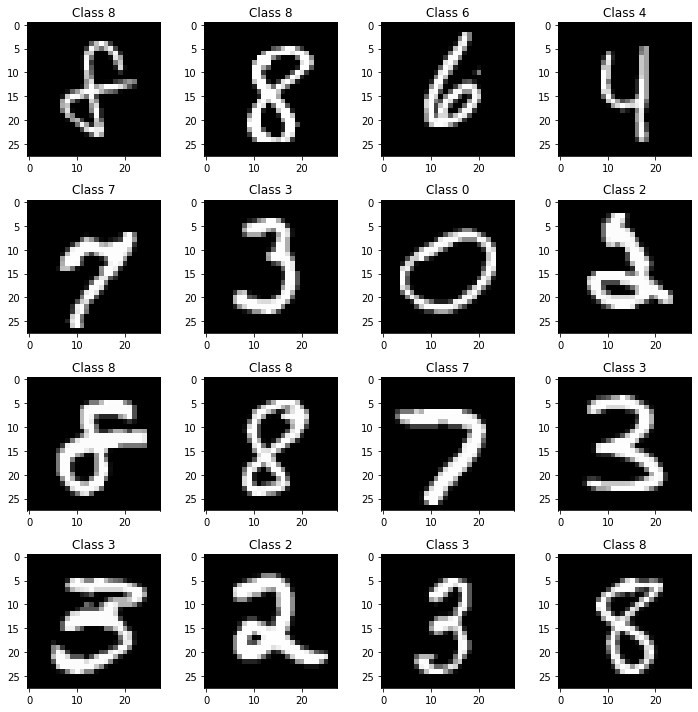

In [3]:
fig = plt.figure()
fig.set_size_inches(10, 10)
for i in range(16):
    plt.subplot(4,4,i+1)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title(f"Class {y_train[num]}")

plt.tight_layout()

**Data normalization :**

We normalize the train and test data such that each pixel is in [0, 1] (instead of [0, 255]). This usually helps the training !

In [4]:
X_train = X_train / 255
X_test = X_test / 255 

In [5]:
nb_classes = 10 # number of unique digits

# One hot encoding
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

Y_train shape (60000, 10)
Y_test shape (10000, 10)


### **Fully connected network**

In [6]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_fc = model.fit(X_train, Y_train,
                       batch_size=128, epochs=5,
                       validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2163 - accuracy: 0.9362 - val_loss: 0.0999 - val_accuracy: 0.9697
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0788 - accuracy: 0.9753 - val_loss: 0.0810 - val_accuracy: 0.9744
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0518 - accuracy: 0.9832 - val_loss: 0.0714 - val_accuracy: 0.9769
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.0717 - val_accuracy: 0.9766
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0678 - val_accuracy: 0.9790


### **Convolutional Neural Network**

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1) # add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)   


In [10]:
model = models.Sequential()

# Convolution Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Convolution Layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Convolution Layer 4
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Flatten 
model.add(layers.Flatten())


# Fully Connected Layer 5
model.add(layers.Dense(512, activation='relu'))

# Fully Connected Layer 6                       
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_CNN = model.fit(X_train, Y_train,
                        batch_size=128, epochs=5,
                        validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 7s 16ms/step - loss: 0.1579 - accuracy: 0.9519 - val_loss: 0.0509 - val_accuracy: 0.9848
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0411 - accuracy: 0.9877 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0227 - val_accuracy: 0.9928
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0283 - val_accuracy: 0.9900
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0233 - val_accuracy: 0.9935


### Check predictions

In [12]:
y_hat = np.argmax(model.predict(X_test), axis=-1)      # Prediction on test

correct_indices = np.nonzero(y_hat == y_test)[0]    # Gives list of correctly classified digits
incorrect_indices = np.nonzero(y_hat != y_test)[0]  # Gives list of index of misclassified digits

**Plots correctly classified digits**

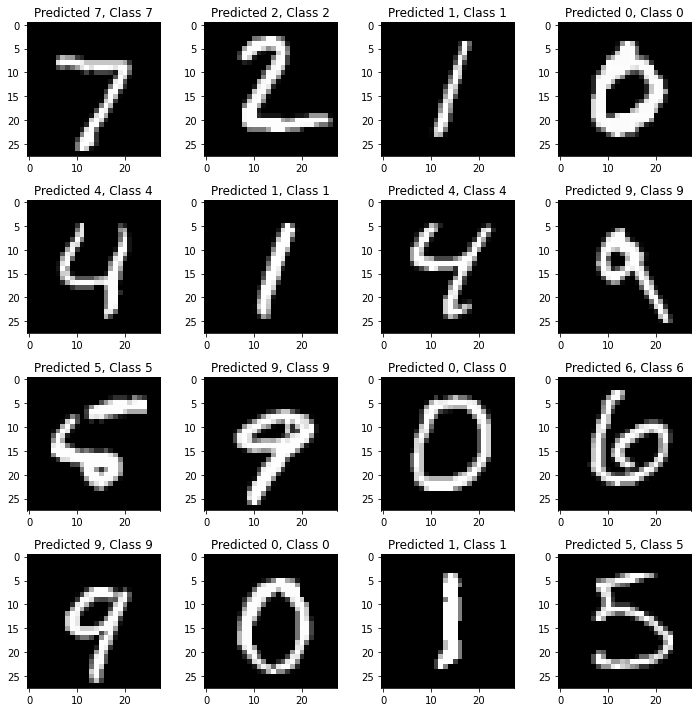

In [13]:
fig = plt.figure()
fig.set_size_inches(10, 10)
for i, index in enumerate(correct_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[index].reshape((28, 28)), cmap='gray')
    plt.title(f"Predicted {y_hat[index]}, Class {y_test[index]}")

plt.tight_layout()

**Plots misclassified digits**

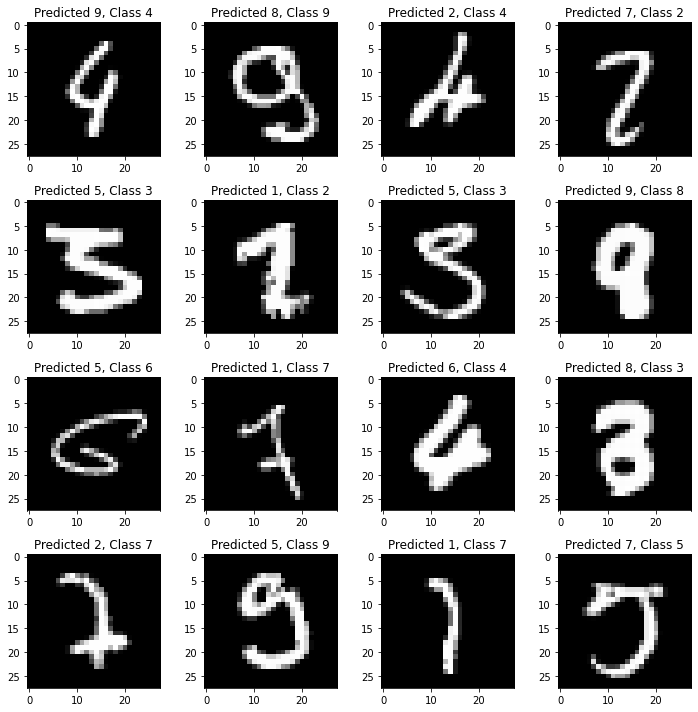

In [14]:
fig = plt.figure()
fig.set_size_inches(10, 10)
for i, index in enumerate(incorrect_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[index].reshape((28, 28)), cmap='gray')
    plt.title(f"Predicted {y_hat[index]}, Class {y_test[index]}")

plt.tight_layout()